# Introduction
- This notebook provides Market Segmentation analysis for Electric Vehicles.
- Two datasets are used here.

# Import Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Extract data
- This is the dataset used for Market Segmentation Analysis

In [38]:
df = pd.read_csv('/content/drive/MyDrive/EV-Dashboard-Data-as-on-20240202.csv')

### Analyze Data

In [39]:
df.head(2)

,Year,Month_name,Day,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,CNG ONLY,DIESEL,...,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total
0,2022,feb,1,2022-02-01,Andaman & Nicobar Island,GOODS CARRIER,Others,Others,0,15,...,0,0,1,0,0,0,0,0,0,16
1,2022,feb,1,2022-02-01,Andaman & Nicobar Island,MAXI CAB,Others,Others,0,1,...,0,0,0,0,0,0,0,0,0,1


In [40]:
# Data Features
df.columns

Index(['Year', 'Month_name', 'Day', 'Date', 'State', 'Vehicle Class',
       'Vehicle Category', 'Vehicle Type', 'CNG ONLY', 'DIESEL',
       'DIESEL/HYBRID', 'DI-METHYL ETHER', 'DUAL DIESEL/BIO CNG',
       'DUAL DIESEL/CNG', 'DUAL DIESEL/LNG', 'ELECTRIC(BOV)', 'ETHANOL',
       'FUEL CELL HYDROGEN', 'LNG', 'LPG ONLY', 'METHANOL', 'NOT APPLICABLE',
       'PETROL', 'PETROL/CNG', 'PETROL/ETHANOL', 'PETROL/HYBRID', 'PETROL/LPG',
       'PETROL/METHANOL', 'SOLAR', 'Total'],
      dtype='object')

# Feature Engineering
- **Step 1:** Extract the important features for the market segmentation analysis.
- **Step 2:** Combine the sales data for various months according to the year, state, vehicle type.

In [41]:
# Extract the important features
df_extracted = df[['Year', 'Month_name', 'State', 'Vehicle Type', 'ELECTRIC(BOV)']]

In [42]:
# Analyze extracted data
df_extracted

,Year,Month_name,State,Vehicle Type,ELECTRIC(BOV)
0,2022,feb,Andaman & Nicobar Island,Others,0
1,2022,feb,Andaman & Nicobar Island,Others,0
2,2022,feb,Andaman & Nicobar Island,2W_Personal,0
3,2022,feb,Andaman & Nicobar Island,2W_Personal,0
4,2022,feb,Andaman & Nicobar Island,4W_Shared,0
...,...,...,...,...,...
96840,2024,jan,Karnataka,Others,0
96841,2024,jan,Karnataka,Others,0
96842,2024,jan,Karnataka,Others,0
96843,2024,jan,Karnataka,Others,0


- The dataset consists of data for 10 years (2014 till 2024)

In [43]:
# df_extracted.Year.value_counts().sort_index()

In [44]:
# df_extracted['ELECTRIC(BOV)'].value_counts()

**Step 2: Combine the sales data for various months according to the year, state, vehicle type.**
- Group the dataset by Year, State, Vehicle Type and then sum the ELECTRIC(BOV) values for each of these groups.

In [45]:
import pandas as pd

# Group by Year, State, Vehicle Type, and sum up the ELECTRIC(BOV) sales value
df_grouped = df_extracted.groupby(['Year', 'State', 'Vehicle Type'])['ELECTRIC(BOV)'].sum().reset_index()

# Rename the 'ELECTRIC(BOV)' column to 'Electric_Sale_Per_Year'
df_grouped.rename(columns={'ELECTRIC(BOV)': 'Electric_Sale_Per_Year'}, inplace=True)

In [46]:
# The new DataFrame (df_grouped) will have the desired structure which will be used for Market Segmentation Analysis
print(df_grouped.head(5))

print(f'\nTotal number of records : {df_grouped.shape[0]}')

   Year                     State Vehicle Type  Electric_Sale_Per_Year
0  2014  Andaman & Nicobar Island  2W_Personal                       0
1  2014  Andaman & Nicobar Island    2W_Shared                       0
2  2014  Andaman & Nicobar Island    3W_Shared                       0
3  2014  Andaman & Nicobar Island  4W_Personal                       0
4  2014  Andaman & Nicobar Island    4W_Shared                       0

Total number of records : 3647


In [47]:
# Types of vehicles considered for market segmentation analysis.
df_grouped['Vehicle Type'].unique()

array(['2W_Personal', '2W_Shared', '3W_Shared', '4W_Personal',
       '4W_Shared', 'Bus', 'Others', 'Institution Bus', '3W_Personal',
       '3W_Goods', '3W_Shared_LowSpeed', '3W_Goods_LowSpeed'],
      dtype=object)

- Let’s not group the data further into categories such as 2-wheelers, 3-wheelers, and so on.
- This is because shared and personal vehicles typically serve very different **market needs, customer profiles, usage patterns, and financial dynamics**.


In [48]:
# Vehicles that come under the "Others" vehicle category
df[df['Vehicle Type'] == 'Others']['Vehicle Class'].unique()[:10]  # Display only 10 names

array(['GOODS CARRIER', 'MAXI CAB', 'SEMI-TRAILER (COMMERCIAL)',
       'ADAPTED VEHICLE', 'AGRICULTURAL TRACTOR', 'AMBULANCE',
       'ARTICULATED VEHICLE', 'CAMPER VAN / TRAILER (PRIVATE USE)',
       'CASH VAN', 'CRANE MOUNTED VEHICLE'], dtype=object)

# **Data Analysis**
- Let us analyze the data on different parameters.

##### **Sale of electric vehicles in different states**

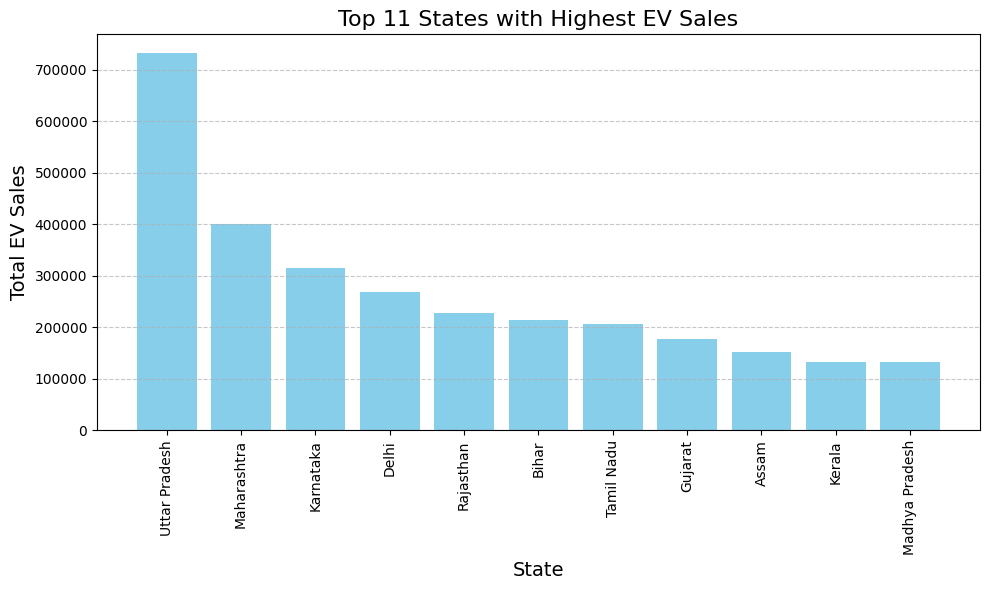

In [49]:
# Group the data by 'State' and sum the 'Electric_Sale_Per_Year'
df_total_sales = df_grouped.groupby('State')['Electric_Sale_Per_Year'].sum().reset_index()

# Sort the states by total sales in descending order
df_sorted_sales = df_total_sales.sort_values(by='Electric_Sale_Per_Year', ascending=False)

# Select the top 11 states
df_top_11_states = df_sorted_sales.head(11)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_top_11_states['State'], df_top_11_states['Electric_Sale_Per_Year'], color='skyblue')

# Add title and labels
plt.title('Top 11 States with Highest EV Sales', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total EV Sales', fontsize=14)

# Rotate the x-axis labels vertically for better readability
plt.xticks(rotation=90)

# Show gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

##### **Overall EV Market Trend (National Level)**

In [50]:
# Group by Year to get the total electric vehicle sales per year across all states and vehicle types
df_yearly = df_grouped.groupby('Year')['Electric_Sale_Per_Year'].sum().reset_index()

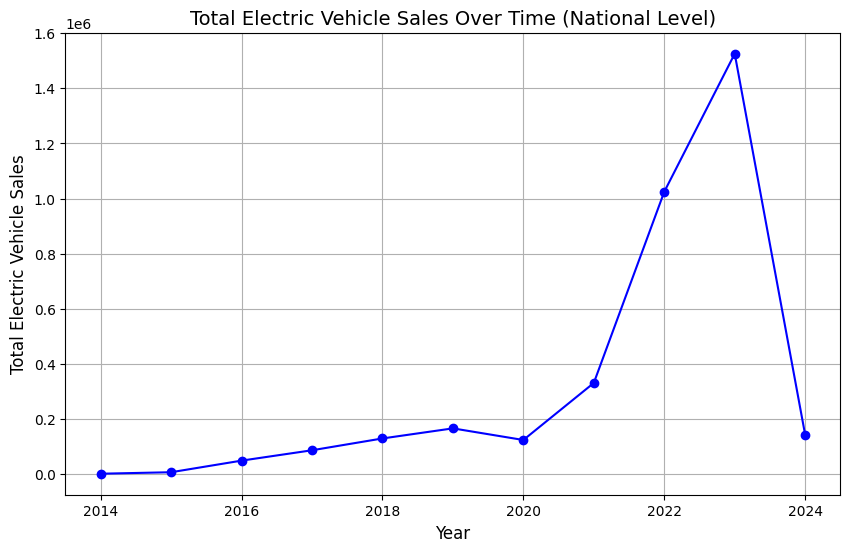

In [51]:
import matplotlib.pyplot as plt

# Plot the total electric vehicle sales over time
plt.figure(figsize=(10,6))
plt.plot(df_yearly['Year'], df_yearly['Electric_Sale_Per_Year'], marker='o', linestyle='-', color='b')
plt.title('Total Electric Vehicle Sales Over Time (National Level)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Electric Vehicle Sales', fontsize=12)
plt.grid(True)
plt.show()


**Observations:**
- The graph above shows that electric vehicles (EVs) are gaining popularity rapidly over the years, with EV sales increasing significantly since 2021.

**Note**
- The dataset includes data up to January 2024. Therefore, the sudden drop in sales for 2024 is shown, but this is not reflective of the actual trend, as the data for 2024 is incomplete.

##### **Breakdown by State**
- Now, to understand state-level trends, analyze the data by grouping it by both Year and State.
- This will help to identify which states are driving growth in the EV market, and whether there are states where the market is stagnating or shrinking.

- Let us analyze the data using 3 different graphs
  - States with **high sales** over the years
  - State with **medium sales** over the years
  - State with **low sales** over the years

<Figure size 1400x800 with 0 Axes>

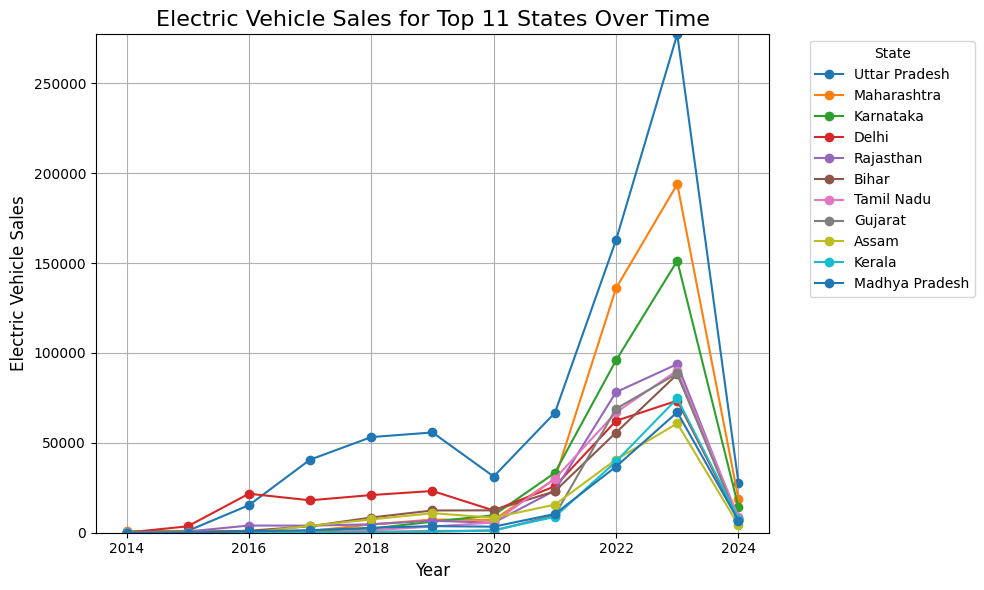

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_grouped is your original DataFrame
# Group by Year and State to get the total electric vehicle sales per year for each state
df_state_yearly = df_grouped.groupby(['Year', 'State'])['Electric_Sale_Per_Year'].sum().reset_index()

# Pivot the data to make it easier to visualize
df_state_pivot = df_state_yearly.pivot(index='Year', columns='State', values='Electric_Sale_Per_Year')

# 1. Calculate total sales per state to divide them into three groups
state_sales = df_state_yearly.groupby('State')['Electric_Sale_Per_Year'].sum().sort_values(ascending=False)

# Split into three groups:
top_11_states = state_sales.head(11).index
middle_11_states = state_sales.iloc[11:22].index
bottom_12_states = state_sales.iloc[22:].index

# 2. Filter the original DataFrame to get only the sales data for each group of states
df_top_11 = df_state_pivot[top_11_states]
df_middle_11 = df_state_pivot[middle_11_states]
df_bottom_12 = df_state_pivot[bottom_12_states]

# 3. Calculate global min and max sales values across all groups for consistent y-axis limits
y_min = min(df_state_pivot.min().min(), df_top_11.min().min(), df_middle_11.min().min(), df_bottom_12.min().min())
y_max = max(df_state_pivot.max().max(), df_top_11.max().max(), df_middle_11.max().max(), df_bottom_12.max().max())

# 4. Plot the sales data for each group

# Plot 1: Top 11 States by electric vehicle sales
plt.figure(figsize=(14, 8))
df_top_11.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6))
plt.title('Electric Vehicle Sales for Top 11 States Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Electric Vehicle Sales', fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.ylim(y_min, y_max)  # Set consistent y-axis range
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

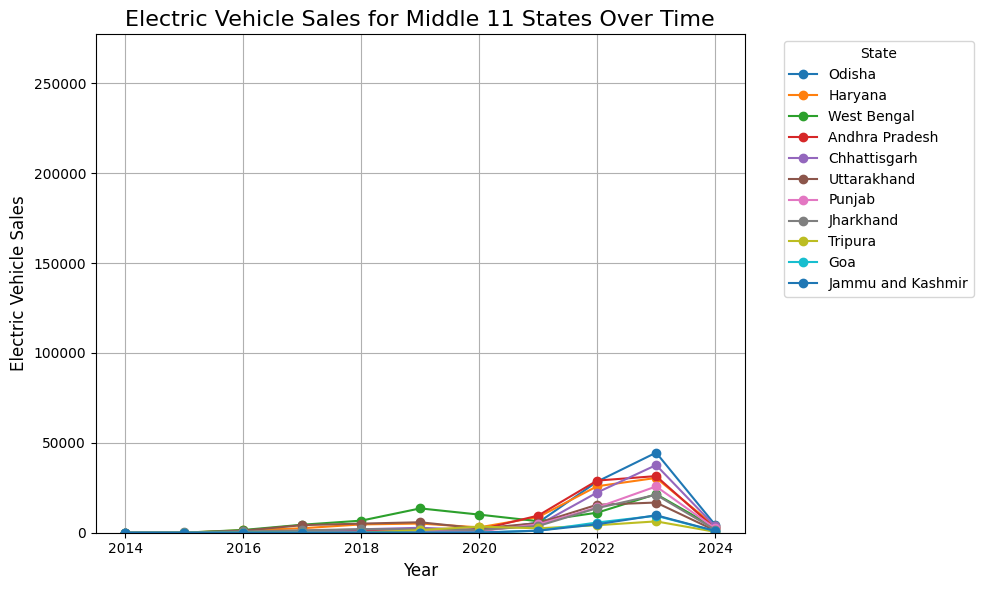

In [53]:

# Plot 2: Middle 11 States by electric vehicle sales
plt.figure(figsize=(14, 8))
df_middle_11.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6))
plt.title('Electric Vehicle Sales for Middle 11 States Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Electric Vehicle Sales', fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.ylim(y_min, y_max)  # Set consistent y-axis range
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

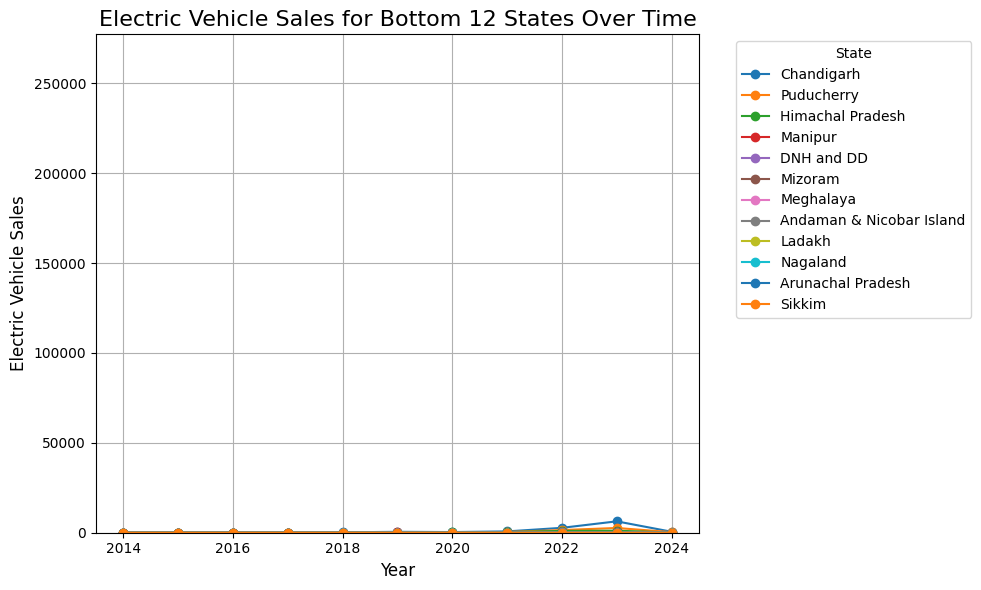

In [54]:

# Plot 3: Bottom 12 States by electric vehicle sales
plt.figure(figsize=(14, 8))
df_bottom_12.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6))
plt.title('Electric Vehicle Sales for Bottom 12 States Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Electric Vehicle Sales', fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.ylim(y_min, y_max)  # Set consistent y-axis range
plt.tight_layout()
plt.show()


##### **Breakdown by Vehicle Type**
- To understand how different vehicle types have evolved in terms of electric vehicle adoption, you can similarly group the data by Year and Vehicle Type.

<Figure size 1400x800 with 0 Axes>

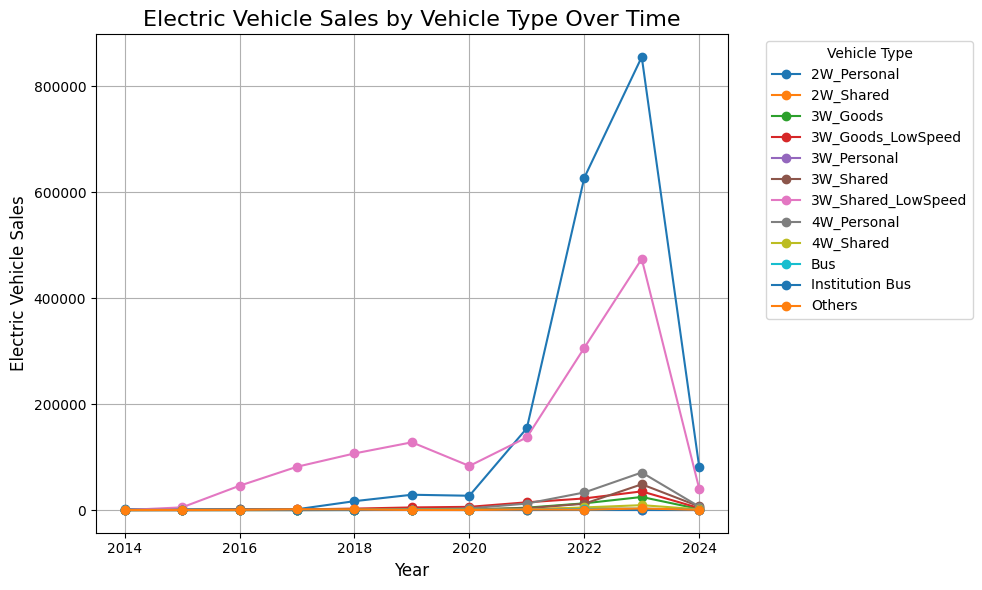

In [55]:
# Group by Year and Vehicle Type to get the total electric vehicle sales per year for each vehicle type
df_type_yearly = df_grouped.groupby(['Year', 'Vehicle Type'])['Electric_Sale_Per_Year'].sum().reset_index()

# Pivot the data to make it easier to visualize
df_type_pivot = df_type_yearly.pivot(index='Year', columns='Vehicle Type', values='Electric_Sale_Per_Year')

# Plot the sales data for each vehicle type over time
plt.figure(figsize=(14,8))
df_type_pivot.plot(kind='line', marker='o', linestyle='-', figsize=(10,6))
plt.title('Electric Vehicle Sales by Vehicle Type Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Electric Vehicle Sales', fontsize=12)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations:**
- The market for 2 wheelers for personal use and low-speed shared 3 wheelers is blooming since 2020.

Note:
- The demand for electric 3-wheelers is driven by their low initial cost.

##### **Combining State and Vehicle Type**
- To further segment the market and combine both state and vehicle type, create a grouped analysis that shows how EV sales vary across both dimensions.

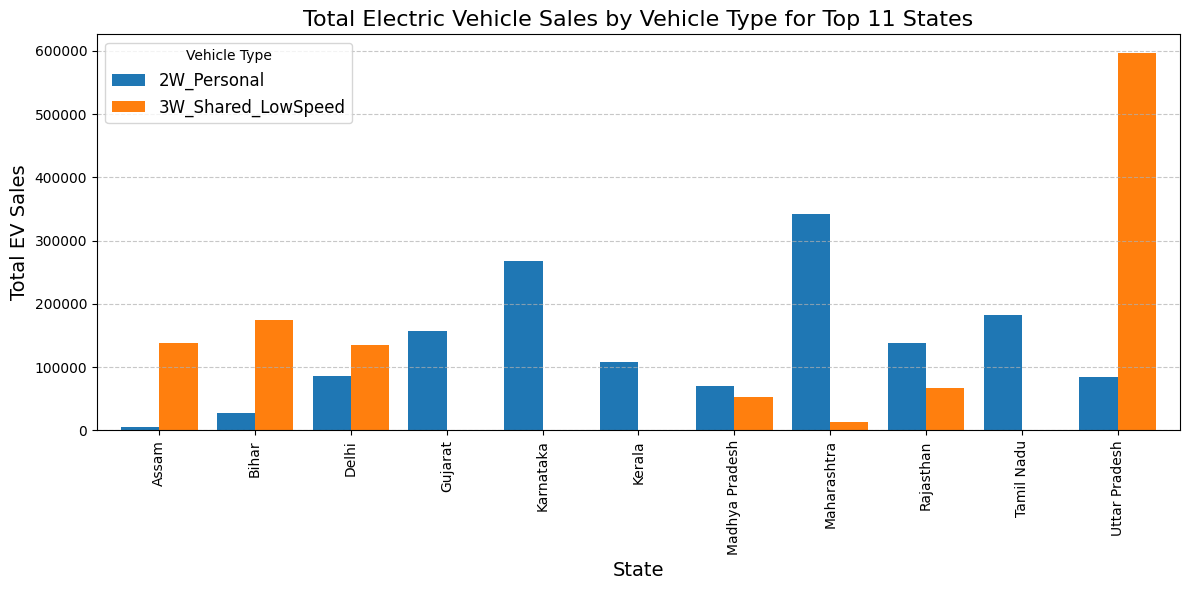

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset for the top 11 states
df_top_11 = df_grouped[df_grouped['State'].isin(top_11_states)]

# Filter for the specific vehicle types (2W_Personal and 3W_Shared_LowSpeed)
df_filtered = df_top_11[df_top_11['Vehicle Type'].isin(['2W_Personal', '3W_Shared_LowSpeed'])]

# Group by state and vehicle type, summing the total sales per year
df_grouped_sales = df_filtered.groupby(['State', 'Vehicle Type'])['Electric_Sale_Per_Year'].sum().reset_index()

# Pivot the data so that each vehicle type becomes a separate column
df_pivot = df_grouped_sales.pivot(index='State', columns='Vehicle Type', values='Electric_Sale_Per_Year').fillna(0)

# Plotting
plt.figure(figsize=(14, 8))

# Create a bar plot for the two vehicle types
df_pivot.plot(kind='bar', width=0.8, figsize=(12, 6), ax=plt.gca())

# Adding title and labels
plt.title('Total Electric Vehicle Sales by Vehicle Type for Top 11 States', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total EV Sales', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Add a legend to distinguish between vehicle types
plt.legend(title='Vehicle Type', fontsize=12)

# Display gridlines for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**Observations:**
The graph shows that:
- Uttar Pradesh has a large market for electric low-speed three-wheelers.
- Maharashtra and Karnataka have large markets for electric two-wheelers for personal use.

# **Market Segmentation - Clustering**
- Clustering techniques to group similar states or vehicle types based on their sales patterns over time.

##### **Step 1. Cluster States based on their sales patterns over time**

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the data for clustering (e.g., using state-wise sales data over time)
df_cluster = df_grouped.pivot_table(index=['State'], columns=['Year'], values='Electric_Sale_Per_Year', aggfunc='sum').fillna(0)

# Standardize the data before clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

In [58]:
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df_cluster.columns[0:-1])
# print(centroids_df)

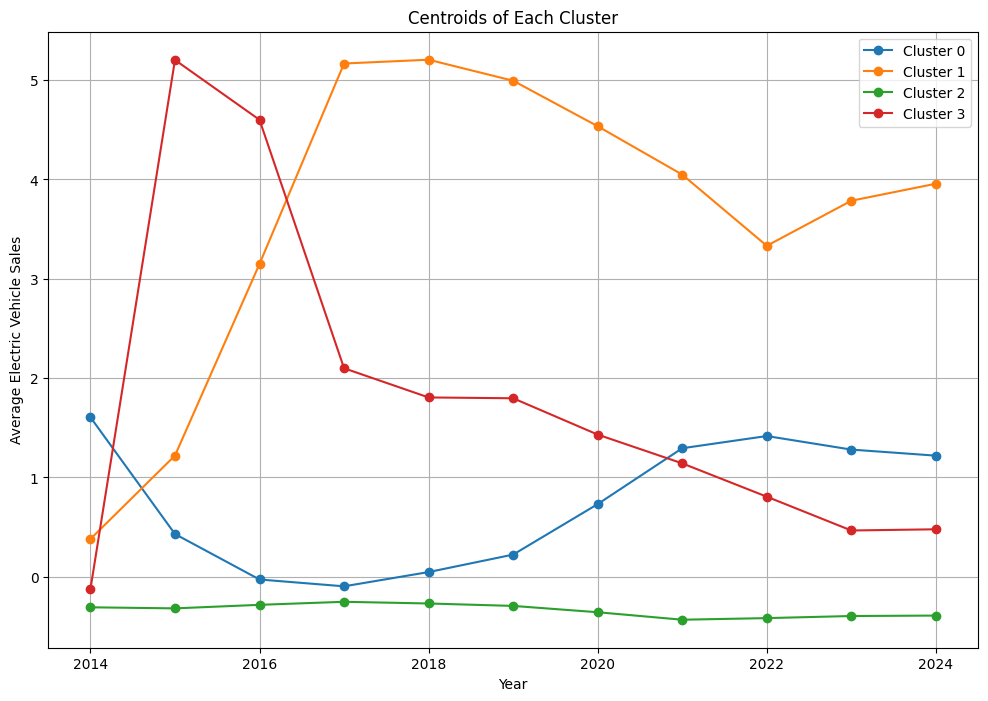

In [59]:
plt.figure(figsize=(12, 8))
for i, centroid in enumerate(centroids):
    plt.plot(df_cluster.columns[0:-1], centroid, label=f"Cluster {i}", marker='o')
plt.title("Centroids of Each Cluster")
plt.xlabel("Year")
plt.ylabel("Average Electric Vehicle Sales")
plt.legend()
plt.grid(True)
plt.show()


**Observations:**
- Cluster 1:
  - Shows rapid growth in sales over the years which represent that electric vehicles are gaining popularity quickly in those states which belong to this cluster.
- Cluster 3:
  - Shows rapid growth in sales initially, but the popularity has decreased rapidly over few years.
  - Analysis of this cluster would give insights about the factors that affect the electric vehicle market. This would help to identify the new markets which fullfills the basic requirements of the market.
-Cluster 2:
  - Shows that EV adoption is slower in those states.
- Cluster 0:
  - Shows that after a period of decline, sales have steadily increased at a modest pace in recent years.

##### **Step 2. Examine States in Each Cluster:**
- To better understand the characteristics of each cluster, group the states by their assigned cluster and analyze the states in each one.

In [60]:
states_by_cluster = df_cluster.groupby('Cluster').apply(lambda x: x.index.tolist())
print(states_by_cluster)


Cluster
0    [Bihar, Karnataka, Maharashtra, Rajasthan, Tam...
1                                      [Uttar Pradesh]
2    [Andaman & Nicobar Island, Andhra Pradesh, Aru...
3                                              [Delhi]
dtype: object


<ipython-input-60-e82140bc67ae>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  states_by_cluster = df_cluster.groupby('Cluster').apply(lambda x: x.index.tolist())


In [61]:
import pandas as pd

# Extract the states grouped by cluster
states_by_cluster = df_cluster.groupby('Cluster').apply(lambda x: x.index.tolist())

# Find the maximum number of states in any cluster
max_states_in_cluster = max(len(states) for states in states_by_cluster)

# Prepare the data for the new DataFrame
clustered_states = {}

# Iterate over each cluster to add the states, filling shorter lists with blanks
for cluster, states in states_by_cluster.items():
    # Fill the list with blanks if it's shorter than the max length
    states_filled = states + [''] * (max_states_in_cluster - len(states))
    clustered_states[cluster] = states_filled

# Convert the dictionary to a DataFrame
df_clustered_states = pd.DataFrame(clustered_states)

# Display the resulting DataFrame
print(df_clustered_states)


              0              1                         2      3
0         Bihar  Uttar Pradesh  Andaman & Nicobar Island  Delhi
1     Karnataka                           Andhra Pradesh       
2   Maharashtra                        Arunachal Pradesh       
3     Rajasthan                                    Assam       
4    Tamil Nadu                               Chandigarh       
5                                           Chhattisgarh       
6                                             DNH and DD       
7                                                    Goa       
8                                                Gujarat       
9                                                Haryana       
10                                      Himachal Pradesh       
11                                     Jammu and Kashmir       
12                                             Jharkhand       
13                                                Kerala       
14                                      

<ipython-input-61-38fa24bfce5c>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  states_by_cluster = df_cluster.groupby('Cluster').apply(lambda x: x.index.tolist())


**Observations:**
- Cluster 0 (**Bihar, Karnataka, Maharashtra, Rajasthan, and Tamil Nadu**) has a good and consistent EV sales rate.
- Cluster 1 (**Uttar Pradesh**) has a rapid EV sales rate.
- Cluster 2 (**includes most of the states**) has a very slow EV sales rate.
- Cluster 3 (**Delhi**) has a high EV sales rate, but it has declined recently.

### **Step 3 - Segment Profiling:**

- EV sales trends in all the states in each cluster can be verified using the graphs shown in the Data Analysis section:
  - 1. Electric Vehicle Sales for **Top** 11 States Over Time
  - 2. Electric Vehicle Sales for **Middle** 11 States Over Time
  - 3. Electric Vehicle Sales for **Bottom** 12 States Over Time

**Observations:**
- The graphs above demonstrate that the model has correctly segmented the states based on their EV vehicle sales over the years.

### **Step 4 - Describing Segments:**


Each cluster can be further analyzed based on the following parameters by collecting data for them:
- **State Population**: States with a higher population are likely to have higher sales rates.
- **Total Vehicle Sales**: This parameter is related to population, as states with higher total vehicle sales may also have higher EV sales.
- **Economic factors**: States with higher income levels might be adopting EVs faster.
- **Government incentives**: Some states might have stronger incentives or subsidies for electric vehicles.
- **EV infrastructure**: States with more charging stations might have higher adoption rates.
- **Climate and environmental policies**: States with stronger environmental regulations might show faster adoption of EVs.


# **Forcasting Sale**
- Let us build a model that will forecast sales, given the year, state name, and vehicle type.

### **Data Preparation**
- Data consists of following features:
  - Year
  - State
  - Vehicle Type
  - EV Sale

### **Data processing**

##### **Data Cleaning**
- Let's build the model using data for the top 11 states, identified during the analysis of EV sales by state.
  - This step is necessary because the State feature will be converted to one-hot encoding. To limit the number of features, we'll only include data from the top 11 states.
- Similarly, let's retain only 2 vehicle types: 2-wheelers for personal use and low-power shared 3-wheelers.
- Remove data for the year 2024, as it is incomplete and may lead to misinterpretations by the model.

In [62]:
# Keep data for only top 11 states
df_grouped = df_top_11

# Keep only 2 vehicle types as - 2-wheeler for personal use and low-power shared 3 wheelers.
df_grouped = df_grouped[(df_grouped['Vehicle Type'] == '2W_Personal') | (df_grouped['Vehicle Type'] == '3W_Shared_LowSpeed')]

# Remove data for year 2024
df_grouped = df_grouped[df_grouped['Year'] < 2024]

##### **Data pre-processing**
- Convert the Sale column to float and the Year column to int.
- Apply one-hot encoding to the State and Vehicle Type columns.


In [63]:
# Convert the Sale column to float and the Year column to int
df_grouped['Year'] = df_grouped['Year'].astype(int)
df_grouped['Electric_Sale_Per_Year'] = df_grouped['Electric_Sale_Per_Year'].astype(float)

# One-hot encoding for categorical variables (State, Vehicle Type)
df_grouped = pd.get_dummies(df_grouped, columns=['State', 'Vehicle Type'], drop_first=True)

### **Build the model**

##### **Split the Data:**

In [64]:
# Let's split the dataset into training (for past data) and testing (for future predictions)
train_data = df_grouped[df_grouped['Year'] < 2023]  # use data up to 2022 for training
test_data = df_grouped[df_grouped['Year'] >= 2023]   # use data from 2023 onwards for testing

X_train = train_data.drop(columns='Electric_Sale_Per_Year')
y_train = train_data['Electric_Sale_Per_Year']
X_test = test_data.drop(columns='Electric_Sale_Per_Year')
y_test = test_data['Electric_Sale_Per_Year']

##### **Build Model:**

In [65]:
import xgboost as xgb

# Create and fit the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

##### **Model Evaluation:**

In [66]:
from sklearn.metrics import r2_score


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

R² Score: 0.7500617880128866


# **Predictions**
Let's predict the sale for:
1. 2-wheeler for personal use in Maharastra and Karnataka in year 2025
2. Low-speed shared 3-wheeler in Uttar Pradesh  

In [73]:
import pandas as pd

# Create the data for making predictins
test_data_1 = pd.DataFrame({
    'Year': [2025, 2025, 2025],  # Sales for 2025
    'State_Bihar': [0, 0, 0],
    'State_Delhi': [0, 0, 0],
    'State_Gujarat': [0, 0, 0],
    'State_Karnataka': [0, 1, 0],  # 1 for Karnataka, 0 for others
    'State_Kerala': [0, 0, 0],
    'State_Madhya Pradesh': [0, 0, 0],
    'State_Maharashtra': [1, 0, 0],  # 1 for Maharashtra
    'State_Rajasthan': [0, 0, 0],
    'State_Tamil Nadu': [0, 0, 0],
    'State_Uttar Pradesh': [0, 0, 1],  # 1 for Uttar Pradesh, 0 for others
    'Vehicle Type_3W_Shared_LowSpeed': [0, 0, 1]  # For shared low-speed 3-wheeler
})

# Show the test data
print(test_data_1)


   Year  State_Bihar  State_Delhi  State_Gujarat  State_Karnataka  \
0  2025            0            0              0                0   
1  2025            0            0              0                1   
2  2025            0            0              0                0   

   State_Kerala  State_Madhya Pradesh  State_Maharashtra  State_Rajasthan  \
0             0                     0                  1                0   
1             0                     0                  0                0   
2             0                     0                  0                0   

   State_Tamil Nadu  State_Uttar Pradesh  Vehicle Type_3W_Shared_LowSpeed  
0                 0                    0                                0  
1                 0                    0                                0  
2                 0                    1                                1  


In [74]:
# Make predictions
y_pred = model.predict(test_data_1)

In [85]:
print("Predicted sale of 2-wheeler for personal use in Maharastra and Maharashtra in year 2025 is:", int(y_pred[0]))
print("Predicted sale of 2-wheeler for personal use in Maharastra and Karnataka in year 2025 is:", int(y_pred[1]))
print("Predicted sale of shared low-speed 3-wheeler in Maharastra and Uttar Pradesh in year 2025 is:", int(y_pred[2]))

Predicted sale of 2-wheeler for personal use in Maharastra and Maharashtra in year 2025 is: 113960
Predicted sale of 2-wheeler for personal use in Maharastra and Karnataka in year 2025 is: 79065
Predicted sale of shared low-speed 3-wheeler in Maharastra and Uttar Pradesh in year 2025 is: 130800
